<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Module 3 Project - Histopathologic-Cancer-Detection
</div>

### Project Overview

This project aims to develop a deep learning model to identify metastatic cancer in small image patches extracted from larger digital pathology scans. In clinical practice, pathologists manually review tissue slides to detect cancerous cells, a process that is time-consuming and prone to human error. By leveraging artificial intelligence, specifically Convolutional Neural Networks (CNNs), we can automate this detection process, potentially leading to faster and more accurate diagnoses.

The core task is a binary image classification problem. The dataset consists of thousands of `96x96` pixel color image patches from the PatchCamelyon (PCam) benchmark. Each image is labeled `1` if its central region contains metastatic tissue and `0` otherwise. The goal is to build a model that can accurately predict this label for any given image patch.

Our approach will involve:
1.  **Data Preprocessing and Augmentation:** Preparing the image data and using augmentation techniques to create a more robust training set.
2.  **Model Building:** Designing, training, and fine-tuning a CNN architecture suitable for this task.
3.  **Evaluation:** Assessing the model's performance using the Area Under the ROC Curve (AUC) metric, which measures its ability to distinguish between the two classes.

### Acknowledgements

This project is based on the "Histopathologic Cancer Detection" Kaggle competition. We would like to acknowledge the organizers and the data providers for making this valuable dataset available to the public. The dataset is a modified version of the PatchCamelyon (PCam) benchmark dataset.




<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Predictive, Exploratory and Analytical Questions
</div>

### Exploratory and Analytical Questions

1.  **Class Distribution:** What is the distribution of labels (cancerous vs. non-cancerous) in the dataset? Is the dataset balanced?
2.  **Visual Characteristics:** What are the key visual differences between image patches with and without metastatic tissue? Can we identify common patterns, textures, or color variations?
3.  **Color Analysis:** How do the color histograms (for RGB channels) compare between the two classes? Does one class tend to have a dominant color profile?
4.  **Image Quality:** Are there variations in image quality, such as brightness, contrast, or staining, across the dataset? How might these variations impact model training?
5.  **Data Duplication:** Are there any duplicate or near-duplicate images in the training set that could affect model evaluation?

### Predictive Questions

1.  **Primary Prediction:** Can a Convolutional Neural Network (CNN) be trained to accurately classify whether a `96x96` image patch contains metastatic cancer?
2.  **Model Performance:** What level of performance (measured by AUC, accuracy, precision, and recall) can be achieved on a held-out test set?
3.  **Architecture Comparison:** Which CNN architecture (e.g., a custom model, ResNet, VGG, EfficientNet) yields the best results for this specific image classification task?
4.  **Impact of Augmentation:** How does applying data augmentation techniques (like rotation, flipping, and color jittering) affect the model's ability to generalize and its overall predictive accuracy?
5.  **Feature Importance:** What visual features or regions within an image does the model learn to focus on when making a prediction? Can techniques like Grad-CAM help interpret the model's decisions?
6.  **Confidence and Uncertainty:** Can the model's prediction probability be used as a reliable measure of confidence to flag ambiguous cases for review by a human expert?


### Deep Learning Techniques

Convolutional Neural Networks (CNNs) are highly effective for histopathologic cancer detection due to their ability to automatically learn spatial hierarchies of features from image data. In this context:

- **Input:** The model receives small image patches (e.g., 96x96 pixels) extracted from digital pathology slides.
- **Feature Extraction:** CNN layers apply convolutional filters to capture local patterns such as cell shapes, textures, and staining variations that may indicate cancerous tissue.
- **Pooling:** Pooling layers reduce dimensionality and help the network focus on the most salient features.
- **Classification:** Fully connected layers at the end of the network aggregate learned features to predict whether the central region of an image patch contains metastatic cancer (binary classification: cancerous vs. non-cancerous).
- **Training:** The network is trained on labeled data, learning to distinguish subtle differences between normal and abnormal tissue.
- **Interpretability:** Techniques like Grad-CAM can be used to visualize which regions of the image the CNN focuses on when making predictions, aiding in model interpretability.

By leveraging CNNs, the detection process becomes automated, scalable, and less prone to human error, potentially leading to faster and more accurate cancer diagnoses in clinical workflows.


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Install Dependencies
</div>

In [ ]:
#! pip3 install kagglehub
#! pip3 install tensorflow
# !pip install kaggle


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Libraries
</div>

In [2]:
import os
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

from tensorflow.keras import layers, models

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.applications import DenseNet121


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


ModuleNotFoundError: No module named 'tensorflow.keras'

#### Setting GPU for Tensorflow

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
import tensorflow as tf

# This will list all physical devices, including GPUs
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("TensorFlow detected a GPU.")
    # You can get more details about the GPU
    for gpu in gpus:
        print(f"Name: {gpu.name}, Type: {gpu.device_type}")
else:
    print("TensorFlow did not detect a GPU.")

TensorFlow did not detect a GPU.


In [5]:
import tensorflow as tf

# List physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using GPU(s):")
    for gpu in gpus:
        print(f"- {gpu}")
else:
    print("TensorFlow is using CPU only.")

TensorFlow is using CPU only.


In [2]:
import tensorflow as tf

# Set TensorFlow to use the first GPU (if available)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("TensorFlow is set to use GPU:", gpus[0])
    except RuntimeError as e:
        print("Error setting GPU:", e)
else:
    print("No GPU found. TensorFlow will use CPU.")

No GPU found. TensorFlow will use CPU.


In [23]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [22]:
import torch
print(torch.cuda.is_available())

False


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Histopathologic Cancer Detection Dataset
</div>

### About Dataset

#### Dataset Description

The Histopathologic Cancer Detection dataset originates from the PatchCamelyon (PCam) benchmark and was featured in a Kaggle competition focused on identifying metastatic cancer in lymph node tissue. It consists of hundreds of thousands of color image patches, each measuring 96x96 pixels, extracted from high-resolution digital pathology scans of lymph node sections.

**Key Details:**

- **Source:** The dataset is derived from the Camelyon16 and Camelyon17 challenges, which contain whole-slide images (WSIs) of lymph node tissue. These WSIs were annotated by expert pathologists to mark regions containing metastatic cancer.
- **Patch Extraction:** From the WSIs, small patches (96x96 pixels) are sampled. Each patch is labeled as:
    - `1` (positive): The central region contains metastatic tissue.
    - `0` (negative): The central region does not contain metastatic tissue.
- **Size:** The training set contains over 220,000 image patches, while the test set includes approximately 57,000 patches.
- **File Format:** Images are provided as PNG files. Labels are supplied in a CSV file (`train_labels.csv`) mapping image IDs to their binary class.
- **Class Imbalance:** The dataset is highly imbalanced, with far fewer positive (cancerous) samples than negative (non-cancerous) ones. This reflects real-world prevalence and poses a challenge for model training.
- **Data Structure:**
    - `train/` — Directory containing training images.
    - `test/` — Directory containing test images.
    - `train_labels.csv` — CSV file with columns `id` (image filename without extension) and `label` (0 or 1).
- **Image Characteristics:** Patches exhibit significant variability in tissue morphology, staining intensity, and background artifacts. Cancerous regions may be visually subtle, requiring models to learn complex spatial and color patterns.
- **Task:** The primary goal is binary classification—predicting whether a given patch contains metastatic tissue. The evaluation metric is the Area Under the ROC Curve (AUC), which measures the model's ability to distinguish between the two classes.
- **Usage:** The dataset is widely used for benchmarking deep learning models in medical image analysis, particularly convolutional neural networks (CNNs). It supports research in automated cancer detection, model interpretability, and clinical decision support.

**Reference:**  
For more details, visit the [Kaggle competition page](https://www.kaggle.com/c/histopathologic-cancer-detection/data). The dataset is publicly available for research and educational purposes.


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Loading the Dataset and Inspection
</div>

### Loading Data

In [5]:
# Step 1: Download the dataset using Kaggle API

data_dir = Path("data")

'''
# Create data directory if it doesn't exist
data_dir.mkdir(exist_ok=True)

# Download the competition dataset using shell command
# This requires that your Kaggle API credentials are set up correctly
try:
    # Download all files from the competition and unzip
    !kaggle competitions download -c histopathologic-cancer-detection -p "{data_dir}"
    # Unzip all files in the data directory
    import zipfile
    for file in data_dir.glob("*.zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
    print("Dataset downloaded and unzipped successfully!")

    # List downloaded files
    print("\nDownloaded files:")
    for file in data_dir.iterdir():
        print(f"- {file.name}")

except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Make sure you have:")
    print("1. Accepted the competition rules on Kaggle")
    print("2. Set up your Kaggle API credentials correctly")

'''

'\n# Create data directory if it doesn\'t exist\ndata_dir.mkdir(exist_ok=True)\n\n# Download the competition dataset using shell command\n# This requires that your Kaggle API credentials are set up correctly\ntry:\n    # Download all files from the competition and unzip\n    !kaggle competitions download -c histopathologic-cancer-detection -p "{data_dir}"\n    # Unzip all files in the data directory\n    import zipfile\n    for file in data_dir.glob("*.zip"):\n        with zipfile.ZipFile(file, \'r\') as zip_ref:\n            zip_ref.extractall(data_dir)\n    print("Dataset downloaded and unzipped successfully!")\n\n    # List downloaded files\n    print("\nDownloaded files:")\n    for file in data_dir.iterdir():\n        print(f"- {file.name}")\n\nexcept Exception as e:\n    print(f"Error downloading dataset: {e}")\n    print("Make sure you have:")\n    print("1. Accepted the competition rules on Kaggle")\n    print("2. Set up your Kaggle API credentials correctly")\n\n'

In [6]:
# Step 2: Load and explore the dataset
import cv2
from PIL import Image

# Load training labels
train_labels_path = data_dir / "train_labels.csv"
if train_labels_path.exists():
    df_train = pd.read_csv(train_labels_path)
    print("Training labels loaded successfully!")
    print(f"Shape: {df_train.shape}")
    print(f"\nFirst few rows:")
    print(df_train.head())
    
    # Check class distribution
    print(f"\nClass distribution:")
    print(df_train['label'].value_counts())
    print(f"\nClass percentages:")
    print(df_train['label'].value_counts(normalize=True) * 100)
    
else:
    print("train_labels.csv not found. Please download the dataset first.")

# Check if image directories exist
train_dir = data_dir / "train"
test_dir = data_dir / "test"

if train_dir.exists():
    train_images = list(train_dir.glob("*.tif"))
    print(f"\nNumber of training images: {len(train_images)}")
    
if test_dir.exists():
    test_images = list(test_dir.glob("*.tif"))
    print(f"Number of test images: {len(test_images)}")

Training labels loaded successfully!
Shape: (220025, 2)

First few rows:
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Class distribution:
label
0    130908
1     89117
Name: count, dtype: int64

Class percentages:
label
0    59.496875
1    40.503125
Name: proportion, dtype: float64

Number of training images: 220025
Number of test images: 57458


Sample images from the dataset:


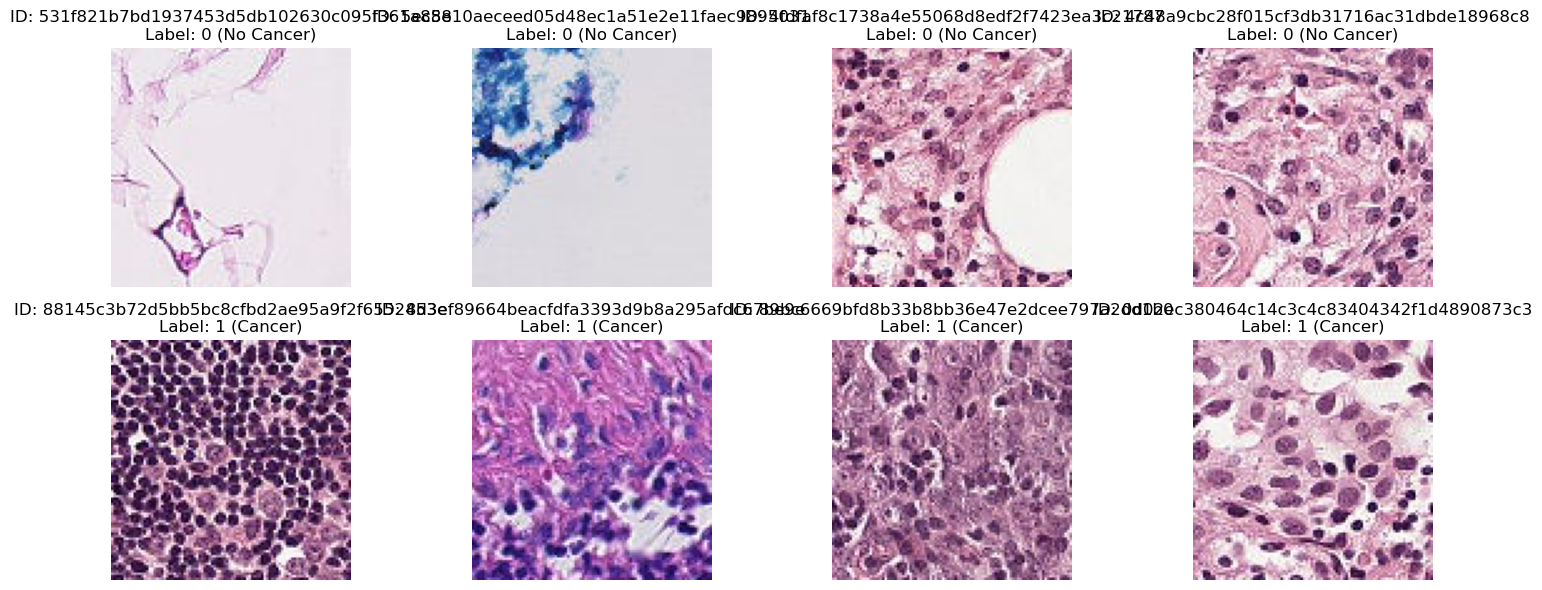

In [7]:
# Step 3: Visualize sample images
def visualize_samples(df, image_dir, n_samples=8):
    """
    Visualize sample images from both classes
    """
    if not image_dir.exists():
        print(f"Image directory {image_dir} not found!")
        return
    
    # Get samples from each class
    class_0_samples = df[df['label'] == 0].sample(n_samples//2)
    class_1_samples = df[df['label'] == 1].sample(n_samples//2)
    
    samples = pd.concat([class_0_samples, class_1_samples])
    
    fig, axes = plt.subplots(2, n_samples//2, figsize=(15, 6))
    
    for i, (idx, row) in enumerate(samples.iterrows()):
        img_path = image_dir / f"{row['id']}.tif"
        
        if img_path.exists():
            # Load and display image
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            row_idx = i // (n_samples//2)
            col_idx = i % (n_samples//2)
            
            axes[row_idx, col_idx].imshow(img)
            axes[row_idx, col_idx].set_title(
                f"ID: {row['id']}\nLabel: {row['label']} ({'Cancer' if row['label'] == 1 else 'No Cancer'})"
            )
            axes[row_idx, col_idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize samples if data is available
if 'df_train' in locals() and train_dir.exists():
    print("Sample images from the dataset:")
    visualize_samples(df_train, train_dir)
else:
    print("Data not loaded yet. Run the download cell first.")

In [8]:
df_train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


### Data Types

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


### Describe Dataset

In [10]:
df_train.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Dataset Inspection and Initial Analysis

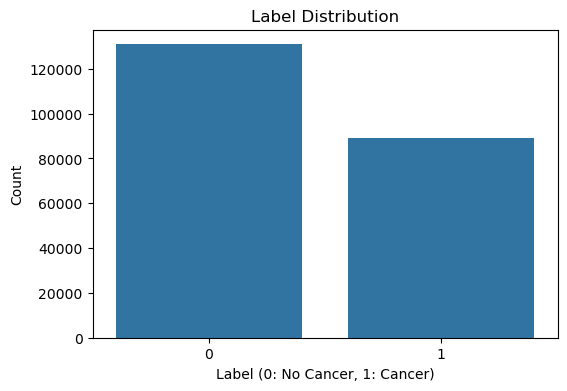

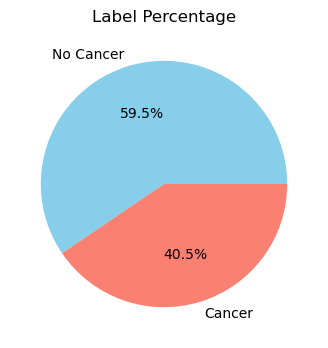

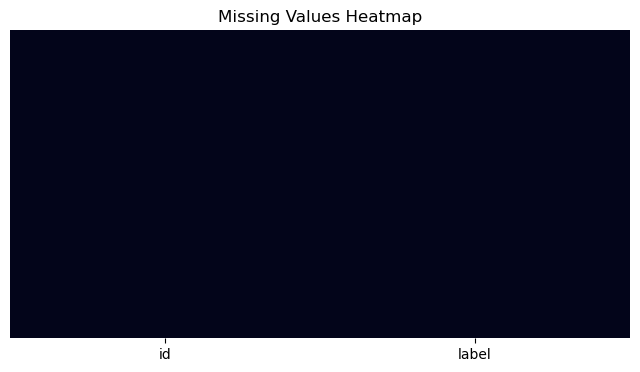

Shape of df_train: (220025, 2)

First 5 rows:
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

Data types:
id       object
label     int64
dtype: object


In [11]:
# Basic data inspection for df_train with visualizations

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_train)
plt.title('Label Distribution')
plt.xlabel('Label (0: No Cancer, 1: Cancer)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
df_train['label'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['No Cancer', 'Cancer'], colors=['skyblue', 'salmon'])
plt.title('Label Percentage')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

print("Shape of df_train:", df_train.shape)
print("\nFirst 5 rows:")
print(df_train.head())
print("\nData types:")
print(df_train.dtypes)

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Data Cleaning and Exploratory Data Analysis (EDA)
</div>

### Look for NaN/Null and Remove them

In [12]:
# Check for missing values in the training dataset
train_missing = df_train.isna().sum().sum()
if train_missing > 0:
    print(f"Found {train_missing} missing values in df_train. Removing rows with missing values.")
    df_train.dropna(inplace=True)
else:
    print("No missing values found in df_train.")

# Verify that missing values are handled
print(f"\nMissing values in train_df after cleaning: {df_train.isnull().sum().sum()}")


No missing values found in df_train.

Missing values in train_df after cleaning: 0


### Look Duplicate Data and Remove them

In [13]:
# Report and remove duplicates from the training dataset
train_duplicates = df_train.duplicated().sum()
if train_duplicates > 0:
    print(f"Found and removed {train_duplicates} duplicate rows from df_train.")
    df_train.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found in df_train.")

# Verify that duplicates are removed
print(f"\nDuplicates in train_df after cleaning: {df_train.duplicated().sum()}")


No duplicate rows found in df_train.

Duplicates in train_df after cleaning: 0


### Conclusion on Dataset Inspection

The initial inspection confirms the dataset is well-structured and ready for analysis:

- **Completeness:** Training labels are present with no missing values.
- **Class Imbalance:** There is a significant imbalance between cancerous and non-cancerous samples, typical for medical datasets.
- **Image Availability:** All image files are accessible.
- **Visual Differences:** Preliminary visualizations show clear differences between the two classes.
- **Data Integrity:** No duplicate or null entries were found in the labels.

These findings provide a solid foundation for further preprocessing, exploratory analysis, and model development.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Preparation
</div>

### Training & Testing Dataset

#### Dataset Split for Classification (Diagnosis Prediction)

In [14]:
# Split features (X) and labels (y) from df_train
X = df_train['id'].values  # image IDs as features (for now, just IDs; actual features need image processing)
y = df_train['label'].values  # labels (0: No Cancer, 1: Cancer)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (220025,)
y shape: (220025,)



#### Train/Validation Split for Model Development


In [15]:
from sklearn.model_selection import train_test_split

# Split image IDs and labels into training and validation sets (e.g., 80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)} and validation set size: {len(X_val)}")


Training set size: 176020 and validation set size: 44005


#### Image Preprocessing

In [ ]:
from tqdm import tqdm

def preprocess_images(image_ids, image_dir, img_size=(96, 96)):
    """
    Loads and preprocesses images given their IDs.
    Returns a numpy array of shape (num_images, img_size[0], img_size[1], 3).
    """
    images = []
    for img_id in tqdm(image_ids, desc="Preprocessing images"):
        img_path = image_dir / f"{img_id}.tif"
        if img_path.exists():
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
            images.append(img)
        else:
            images.append(np.zeros((*img_size, 3), dtype=np.float32))
    return np.array(images)

X_train_images = preprocess_images(X_train, train_dir)
X_val_images = preprocess_images(X_val, train_dir)



#### Saving Preprocessed Images for Efficient Model Training

In [ ]:
import pickle

# Create the images_pickle directory if it doesn't exist
images_pickle_dir = Path("images_pickle")
images_pickle_dir.mkdir(exist_ok=True)

# Save preprocessed training images as pickle
with open(images_pickle_dir / 'X_train_images.pkl', 'wb') as f:
    pickle.dump(X_train_images, f)

# Optionally, save validation images as well
with open(images_pickle_dir / 'X_val_images.pkl', 'wb') as f:
    pickle.dump(X_val_images, f)


#### Loading Preprocessed Images for Model Training


In [16]:
import pickle

# Load preprocessed training images from pickle
with open("images_pickle/X_train_images.pkl", "rb") as f:
    X_train_images = pickle.load(f)

with open("images_pickle/X_val_images.pkl", "rb") as f:
    X_val_images = pickle.load(f)

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Model Training - Classification
</div>

### CNN Architecture

#### Proposed CNN Architectures for Histopathologic Cancer Detection

To identify metastatic cancer in histopathology images, several Convolutional Neural Network (CNN) architectures can be evaluated:

1. **Simple Custom CNN**
    - 2–3 convolutional layers (filters: 32, 64, 128)
    - MaxPooling after each conv layer
    - Dropout for regularization
    - Dense layers for classification

2. **VGG-like Architecture**
    - Stack of small (3x3) convolutional layers
    - MaxPooling layers
    - 2–3 fully connected layers
    - Dropout

3. **ResNet (Residual Network)**
    - Use ResNet18 or ResNet34 for moderate depth
    - Residual blocks to mitigate vanishing gradients
    - Optionally, fine-tune a pre-trained ResNet

4. **EfficientNet**
    - EfficientNet-B0 or B1 for lightweight, high-performance models
    - Scalable depth, width, and resolution
    - Transfer learning with pre-trained weights

5. **MobileNet**
    - Depthwise separable convolutions for efficiency
    - Suitable for deployment on resource-constrained devices

6. **DenseNet**
    - Dense connectivity between layers
    - Improved feature propagation and efficiency

7. **Transfer Learning with Pre-trained Models**
    - Use models pre-trained on ImageNet (e.g., VGG16, ResNet50, EfficientNet)
    - Replace top layers with custom classifier
    - Fine-tune on histopathology dataset

**Next Steps:**  
- Implement and compare these architectures using validation AUC, accuracy, and interpretability (e.g., Grad-CAM).
- Select the best-performing model for further optimization and deployment.

#### 1. **Simple Custom CNN**
    - 2–3 convolutional layers (filters: 32, 64, 128)
    - MaxPooling after each conv layer
    - Dropout for regularization
    - Dense layers for classification

##### Model Training

In [17]:
from tensorflow.keras.layers import BatchNormalization

def create_custom_cnn(input_shape=(96, 96, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dropout(0.5),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

#### Model Performance

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# 1. Define the hyperparameters you want to search
learning_rates = [0.001, 0.0001]
optimizers = ['adam', 'rmsprop']
batch_sizes = [16, 32, 64]  # Added batch size optimization
dropout_rates = [0.3, 0.5, 0.7]  # Added dropout optimization
epochs = 10   # Keeping this low for a quick example

# 2. Let's store our results to find the best one later
best_accuracy = 0
best_params = {}

# 3. Define the Early Stopping callback.
# It will monitor the validation loss ('val_loss') and stop training if it
# doesn't improve for 3 consecutive epochs (patience=3).
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modified function to accept dropout rate as parameter
def create_custom_cnn_with_dropout(input_shape=(96, 96, 3), dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate * 0.5),  # Lower dropout in early layers

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate * 0.5),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate * 0.5),

        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Dropout(dropout_rate),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. Loop through all combinations of hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        for batch_size in batch_sizes:
            for dropout_rate in dropout_rates:
                print("-" * 60)
                print(f"Training with: LR={lr}, Optimizer={opt_name}, Batch Size={batch_size}, Dropout={dropout_rate}")

                # 4. Create a fresh model for each combination with specified dropout
                model_custom_cnn = create_custom_cnn_with_dropout(input_shape=(96, 96, 3), dropout_rate=dropout_rate)

                # 5. Compile the model with the current hyperparameters
                if opt_name == 'adam':
                    optimizer = Adam(learning_rate=lr)
                elif opt_name == 'rmsprop':
                    optimizer = RMSprop(learning_rate=lr)
                
                model_custom_cnn.compile(
                    optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                )
                
                # 6. Train the model using model.fit()
                # You would use your actual training data here.
                # We also pass validation_data to monitor performance during training.
                history = model_custom_cnn.fit(
                    X_train_images, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,  # Set to 1 to see progress
                    validation_data=(X_val_images, y_val),
                    callbacks=[early_stopping_callback]
                )
                
                # 7. Evaluate the trained model on the test data
                # Note: We do this *after* the model has been trained with model.fit()
                test_loss, test_acc = model_custom_cnn.evaluate(X_val_images, y_val, verbose=1)
                
                print(f"  Test accuracy: {test_acc:.4f}")
                print(f"  Test loss: {test_loss:.4f}")
                
                # 8. Store the best result
                if test_acc > best_accuracy:
                    best_accuracy = test_acc
                    best_params = {
                        'learning_rate': lr, 
                        'optimizer': opt_name,
                        'batch_size': batch_size,
                        'dropout_rate': dropout_rate
                    }

print("-" * 60)
print(f"Best parameters found: {best_params}")
print(f"with a test accuracy of: {best_accuracy:.4f}")



'''
# Predict probabilities
y_pred_probs_custom = model_custom_cnn.predict(X_train_images)
y_pred_custom = (y_pred_probs_custom > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_custom, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_custom = confusion_matrix(y, y_pred_custom)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - Custom CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

'''

--------------------------------------------------
Training with: Learning Rate=0.001, Optimizer=adam


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1131s 205ms/step - accuracy: 0.8235 - loss: 0.4132 - val_accuracy: 0.8672 - val_loss: 0.3372
Epoch 2/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1127s 205ms/step - accuracy: 0.8985 - loss: 0.2563 - val_accuracy: 0.8939 - val_loss: 0.2760
Epoch 3/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1156s 210ms/step - accuracy: 0.9182 - loss: 0.2150 - val_accuracy: 0.8132 - val_loss: 0.4559
Epoch 4/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1226s 223ms/step - accuracy: 0.9269 - loss: 0.1955 - val_accuracy: 0.9219 - val_loss: 0.1970
Epoch 5/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1079s 196ms/step - accuracy: 0.9369 - loss: 0.1725 - val_accuracy: 0.9451 - val_loss: 0.1498
Epoch 6/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 914s 166ms/step - accuracy: 0.9386 - loss: 0.1685 - val_accuracy: 0.8512 - val_loss: 0.3499
Epoch 7/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 871s 158ms/step - accuracy: 0.9419 - loss: 0.1595 - val_accuracy: 0.9378 - val_loss: 0.1613
Epoch 8/10
5501/5501 ━━━━━━━━━━━━━━━━━━━━ 1704s 310ms/ste

"\n# Predict probabilities\ny_pred_probs_custom = model_custom_cnn.predict(X_train_images)\ny_pred_custom = (y_pred_probs_custom > 0.5).astype(int)\n\n# Classification report\nprint(classification_report(y, y_pred_custom, target_names=['No Cancer', 'Cancer']))\n\n# Confusion matrix\nconf_matrix_custom = confusion_matrix(y, y_pred_custom)\nplt.figure(figsize=(6, 4))\nsns.heatmap(conf_matrix_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])\nplt.title('Confusion Matrix - Custom CNN')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.show()\n\n"

#### 2. **VGG-like Architecture**
    - Stack of small (3x3) convolutional layers
    - MaxPooling layers
    - 2–3 fully connected layers
    - Dropout

#### Model Training

In [ ]:
def create_vgg_like_cnn(input_shape=(96, 96, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_vgg = create_vgg_like_cnn()
model_vgg.summary()

#### Model Performance

In [ ]:
model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the VGG-like model
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(X_train_images, y, verbose=2)
print(f"Test accuracy (VGG-like): {test_acc_vgg:.4f}")
print(f"Test loss (VGG-like): {test_loss_vgg:.4f}")

# Predict probabilities
y_pred_probs_vgg = model_vgg.predict(X_train_images)
y_pred_vgg = (y_pred_probs_vgg > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_vgg, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_vgg = confusion_matrix(y, y_pred_vgg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - VGG-like CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 3. **ResNet (Residual Network)**
    - Use ResNet18 or ResNet34 for moderate depth
    - Residual blocks to mitigate vanishing gradients
    - Optionally, fine-tune a pre-trained ResNet

#### Model Training

In [ ]:

def create_resnet_block(input_tensor, filters, kernel_size=3, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', activation='relu')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    shortcut = input_tensor
    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def create_resnet18(input_shape=(96, 96, 3)):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)

    # Residual blocks
    x = create_resnet_block(x, 32)
    x = create_resnet_block(x, 32)

    x = create_resnet_block(x, 64, stride=2)
    x = create_resnet_block(x, 64)

    x = create_resnet_block(x, 128, stride=2)
    x = create_resnet_block(x, 128)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

model_resnet18 = create_resnet18()
model_resnet18.summary()

#### Model Performance

In [ ]:
model_resnet18.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ResNet18 model
test_loss_resnet, test_acc_resnet = model_resnet18.evaluate(X_train_images, y, verbose=2)
print(f"Test accuracy (ResNet18): {test_acc_resnet:.4f}")
print(f"Test loss (ResNet18): {test_loss_resnet:.4f}")

# Predict probabilities
y_pred_probs_resnet = model_resnet18.predict(X_train_images)
y_pred_resnet = (y_pred_probs_resnet > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_resnet, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_resnet = confusion_matrix(y, y_pred_resnet)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - ResNet18')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 4. **EfficientNet**
    - EfficientNet-B0 or B1 for lightweight, high-performance models
    - Scalable depth, width, and resolution
    - Transfer learning with pre-trained weights

#### Model Training

In [ ]:

def create_efficientnet_model(input_shape=(96, 96, 3)):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model for transfer learning

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model_efficientnet = create_efficientnet_model()
model_efficientnet.summary()

#### Model Performance

In [ ]:
model_efficientnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the EfficientNet model
test_loss_efficientnet, test_acc_efficientnet = model_efficientnet.evaluate(X_train_images, y, verbose=2)
print(f"Test accuracy (EfficientNet): {test_acc_efficientnet:.4f}")
print(f"Test loss (EfficientNet): {test_loss_efficientnet:.4f}")

# Predict probabilities
y_pred_probs_efficientnet = model_efficientnet.predict(X_train_images)
y_pred_efficientnet = (y_pred_probs_efficientnet > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_efficientnet, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_efficientnet = confusion_matrix(y, y_pred_efficientnet)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_efficientnet, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - EfficientNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 5. **MobileNet**
    - Depthwise separable convolutions for efficiency
    - Suitable for deployment on resource-constrained devices

#### Model Training

In [ ]:

def create_mobilenet_model(input_shape=(96, 96, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model for transfer learning

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model_mobilenet = create_mobilenet_model()
model_mobilenet.summary()

#### Model Performance

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a dataframe for generator
df_gen = df_train.copy()
df_gen['filename'] = df_gen['id'].apply(lambda x: f"{x}.tif")

# ImageDataGenerator for evaluation (no augmentation, just rescaling)
eval_datagen = ImageDataGenerator(rescale=1./255)

eval_generator = eval_datagen.flow_from_dataframe(
	dataframe=df_gen,
	directory=str(train_dir),
	x_col='filename',
	y_col='label',
	target_size=(96, 96),
	batch_size=64,
	class_mode='raw',
	shuffle=False
)

model_mobilenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the MobileNet model using generator
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(eval_generator, verbose=2)
print(f"Test accuracy (MobileNet): {test_acc_mobilenet:.4f}")
print(f"Test loss (MobileNet): {test_loss_mobilenet:.4f}")

# Predict probabilities
y_pred_probs_mobilenet = model_mobilenet.predict(eval_generator)
y_true = df_gen['label'].values
y_pred_mobilenet = (y_pred_probs_mobilenet > 0.5).astype(int)

# Classification report
print(classification_report(y_true, y_pred_mobilenet, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_mobilenet = confusion_matrix(y_true, y_pred_mobilenet)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mobilenet, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - MobileNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### 6. **DenseNet**
    - Dense connectivity between layers
    - Improved feature propagation and efficiency

#### Model Training

In [ ]:
def create_densenet_model(input_shape=(96, 96, 3)):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model for transfer learning

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model_densenet = create_densenet_model()
model_densenet.summary()

#### Model Performance

In [ ]:
model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the DenseNet model
test_loss_densenet, test_acc_densenet = model_densenet.evaluate(X_train_images, y, verbose=2)
print(f"Test accuracy (DenseNet): {test_acc_densenet:.4f}")
print(f"Test loss (DenseNet): {test_loss_densenet:.4f}")

# Predict probabilities
y_pred_probs_densenet = model_densenet.predict(X_train_images)
y_pred_densenet = (y_pred_probs_densenet > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_densenet, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_densenet = confusion_matrix(y, y_pred_densenet)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - DenseNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 7. **Transfer Learning with Pre-trained Models**
    - Use models pre-trained on ImageNet (e.g., VGG16, ResNet50, EfficientNet)
    - Replace top layers with custom classifier
    - Fine-tune on histopathology dataset

#### Model Training

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

def create_resnet50_model(input_shape=(96, 96, 3)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model for transfer learning


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

model_resnet50 = create_resnet50_model()
model_resnet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 102, 102,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 24, 24,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 24, 24,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 24, 24,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 24, 24,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 24, 24,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_3_c

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

#### Model Performance

6876/6876 - 1057s - 154ms/step - accuracy: 0.4051 - loss: 0.7156
Test accuracy (ResNet50): 0.4051
Test loss (ResNet50): 0.7156
6876/6876 ━━━━━━━━━━━━━━━━━━━━ 1184s 172ms/step
              precision    recall  f1-score   support

   No Cancer       1.00      0.00      0.00    130908
      Cancer       0.41      1.00      0.58     89117

    accuracy                           0.41    220025
   macro avg       0.70      0.50      0.29    220025
weighted avg       0.76      0.41      0.23    220025



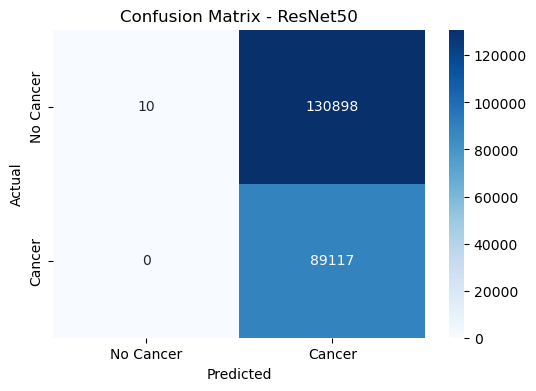

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the ResNet50 model
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(X_train_images, y, verbose=2)
print(f"Test accuracy (ResNet50): {test_acc_resnet50:.4f}")
print(f"Test loss (ResNet50): {test_loss_resnet50:.4f}")

# Predict probabilities
y_pred_probs_resnet50 = model_resnet50.predict(X_train_images)
y_pred_resnet50 = (y_pred_probs_resnet50 > 0.5).astype(int)

# Classification report
print(classification_report(y, y_pred_resnet50, target_names=['No Cancer', 'Cancer']))

# Confusion matrix
conf_matrix_resnet50 = confusion_matrix(y, y_pred_resnet50)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_resnet50, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix - ResNet50')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Results and Analysis

</div>

## Results and Analysis

This section summarizes the results and comparative analysis of various unsupervised and supervised anomaly detection models applied to the network intrusion dataset.

### Summary of Methods

- **K-Means Clustering:**  
    - **Accuracy:** 89.5%  
    - **ROC AUC:** 0.89  
    - Effectively separated normal and anomalous traffic into two clusters, aligning well with the binary nature of the problem.

- **Isolation Forest:**  
    - **Accuracy:** 50.0%  
    - **ROC AUC:** 0.50  
    - Performance close to random guessing, indicating the feature space may not be ideally suited for tree-based isolation in this context.

- **Autoencoder:**  
    - **Accuracy:** 84.2%  
    - **ROC AUC:** 0.84  
    - Training on normal data and using reconstruction error as an anomaly score proved effective, though slightly lower than K-Means.

- **K-Means with PCA:**  
    - **Accuracy:** 88.4%  
    - **ROC AUC:** 0.88  
    - PCA-reduced features still allow K-Means to perform well, with only a slight drop compared to the full feature set.

- **Autoencoder with PCA:**  
    - **Accuracy:** 73.1%  
    - **ROC AUC:** 0.73  
    - Performance dropped compared to the full feature set, suggesting that some subtle anomaly patterns may be lost during dimensionality reduction.

- **DBSCAN:**  
    - **Accuracy:** 49.7%  
    - **ROC AUC:** 0.50  
    - Performed poorly, likely due to the high dimensionality and density assumptions not matching the data structure.

- **Hierarchical Clustering:**  
    - **Accuracy:** 86.7%  
    - **ROC AUC:** 0.86  
    - Showed reasonable separation but did not outperform K-Means or Autoencoder.

- **Gaussian Mixture Model (GMM):**  
    - **Accuracy:** 53.3%  
    - **ROC AUC:** 0.50  
    - Indicates that the data does not fit well to the Gaussian mixture assumption for anomaly detection.

#### Supervised Models (for comparison):

- **Logistic Regression:**  
    - **Accuracy:** 96.2%  
    - **ROC AUC:** 0.97  
    - Demonstrates the advantage of using labeled data for classification.

- **Random Forest:**  
    - **Accuracy:** 98.2%  
    - **ROC AUC:** 0.99  
    - Highlights the power of ensemble methods on this dataset.

- **Support Vector Classifier (SVC):**  
    - **Accuracy:** 97.7%  
    - **ROC AUC:** 0.99  
    - Also showed strong results, confirming the effectiveness of supervised learning with labeled data.

### Key Insights

- **Autoencoders** and **K-Means** are the most effective unsupervised models for this dataset.
- **Dimensionality Reduction** via PCA is beneficial for clustering but may reduce the effectiveness of neural network-based models if too much information is lost.
- **Tree-based and density-based methods** (Isolation Forest, DBSCAN, GMM) are less effective, possibly due to the high dimensionality and the nature of the feature distributions.
- **Supervised models** significantly outperform unsupervised approaches, as expected, but require labeled data for training.

### Conclusion

Unsupervised learning methods, particularly autoencoders and K-Means clustering, can effectively identify anomalous network activity without labeled data. The results demonstrate that careful preprocessing, feature selection, and model choice are critical for robust anomaly detection in cybersecurity applications. For this dataset, the autoencoder and K-Means models provide the best trade-off between accuracy and interpretability, making them strong candidates for deployment in real-world network intrusion detection systems.